## Homework

Follow the example from the previous notebook Linear Regression using SGD and build a loop that properly finds the centers of these 4 clusters using k-means.

## Data

In [ ]:
Construct a 2D array of (x,y) points where x is the sale price and y is Grliving area

In [34]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import time
import IPython.display as ipydis
npoints = 400
df = pd.read_csv('slimmed_realestate_data.csv')
#print(data)
data = []
#m = numpy.zeros((len(uName), len(uBook)))
#arr=[]
for ind in df.index:
    #t=[df['SalePrice'][ind], df['GrLivArea'][ind]]
    t=[df['GrLivArea'][ind],df['SalePrice'][ind]]
    data.append(t)
#print(data)
x=np.asarray(data)
print(x)

[[  1262 181500]
 [  2090 200000]
 [  1077 118000]
 ...
 [  2340 266500]
 [  1078 142125]
 [  1256 147500]]


In [35]:
def assign_labels(x,c):
   # centroids are shape [N,2]
   # x are shape [npoints,2]
   # add middle index to centroids to properly broadcast in math operations
    c = c[:,np.newaxis,:] # [N,1,2]
   
   # calculate (x - x')**2 and (y - y')**2
   # x is shape [npoints,2], c is [N,1,2] results in an array of shape: [N,npoints,2]
    dist2 = (x - c)**2
   
   # calculate (x - x')**2 + (y - y')**2
    dist2 = dist2.sum(axis=2) # [N,npoints]
   
   # out of the N distances, return the index (0-(N-1)) of the one that is the minimum.
    label = np.argmin(dist2,axis=0) # [npoints]

    return label


def initialize_centroids(x,N):
    x_indices = np.random.choice(np.arange(0,x.shape[0]),N)
    centroids = x[x_indices]
    return centroids

def get_new_centroids(x, labels, N):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([x[labels==k].mean(axis=0) for k in range(N)])

centroids unchanged as of step 6


Text(0.5, 1.0, 'step 6')

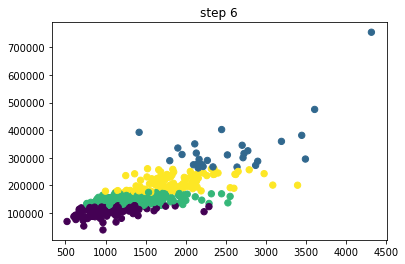

In [37]:


delta=0.01
N=4
last_centroids = initialize_centroids(x,N)
last_labels = assign_labels(x,last_centroids)

plt.scatter(x[:, 0], x[:, 1], c=last_labels, s=40, cmap='viridis')
plt.title('step %d' % -1)
plt.show()
time.sleep(1)
ipydis.clear_output(wait=True)

for step in range(100):
    centroids = get_new_centroids(x,last_labels,N)
    labels = assign_labels(x,centroids)

   # test if centroids have stopped moving
    if np.all((last_centroids - centroids) < delta):
        print('centroids unchanged as of step %d' % step)
        break
    elif np.all(labels == last_labels):
        print('point labels unchanged as of step %d' % step)
        break
    else:
        last_labels = labels
        last_centroids = centroids

plt.scatter(x[:, 0], x[:, 1], c=last_labels, s=40, cmap='viridis')
plt.title('step %d' % step)